## MERGING BOTH DATASETS

In [1]:
# for data
import pandas as pd
import numpy as np

# for geospatial
import geopandas as gpd
import geojson

# for viz
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

## DEF AND GLOBAL VARIABLES

In [2]:
# GLOBAL variables
CLEAN_PATH = '../data/clean' # transform this into temp file
FILE_TO_MODEL = 'all_data.geojson'

NAMES_DICT = {
    
    'build_gdf': 'bu_point',
    'arturo_gdf': 'qlity_mdl',
    'madrid_gdf': 'madrid_gdf'
}

MADRID_EPSG = 25830
STATE = 42

 OPENING DATA 


In [3]:
# Opening and naming of ALL DATA
madrid_gdf = gpd.read_file(f"{CLEAN_PATH}/{FILE_TO_MODEL}")
madrid_gdf.name = NAMES_DICT['madrid_gdf']
madrid_gdf.set_index('ID', inplace = True)

In [5]:
madrid_gdf.head()

,n_BuildingUnits,n_Dwellings,nFloors_AG,nFloors_BG,ID_part,area_m2c,area_m2p,train,land_use_mix,closeness_small_parks,...,currentUse_agriculture,currentUse_industrial,currentUse_office,currentUse_publicServices,currentUse_residential,currentUse_retail,conditionOfConstruction_declined,conditionOfConstruction_functional,conditionOfConstruction_ruin,geometry
ID,,,,,,,,,,,,,,,,,,,,,
0002601VK4700A,16,16,10,0,4,1809,199,0.300000,0.000235,231.284766,...,0,0,0,0,1,0,0,1,0,POINT (439951.830 4470056.850)
0002602VK4700A,16,16,10,0,4,1809,199,0.222222,0.000235,228.583545,...,0,0,0,0,1,0,0,1,0,POINT (439961.160 4470043.370)
0002603VK4700A,16,16,10,0,4,1809,199,0.285714,0.000227,232.442433,...,0,0,0,0,1,0,0,1,0,POINT (439970.490 4470029.880)
0002604VK4700A,16,16,10,0,4,1809,199,0.000000,0.000183,235.336598,...,0,0,0,0,1,0,0,1,0,POINT (439979.830 4470016.390)
0002605VK4700A,16,16,10,0,4,1809,199,0.000000,0.000141,255.595757,...,0,0,0,0,1,0,0,1,0,POINT (439989.160 4470002.910)


In [6]:
madrid_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 92522 entries, 0002601VK4700A to 9999720VK4799H
Data columns (total 81 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   n_BuildingUnits                     92522 non-null  int64   
 1   n_Dwellings                         92522 non-null  int64   
 2   nFloors_AG                          92522 non-null  int64   
 3   nFloors_BG                          92522 non-null  int64   
 4   ID_part                             92522 non-null  int64   
 5   area_m2c                            92522 non-null  int64   
 6   area_m2p                            92522 non-null  int64   
 7   train                               92522 non-null  float64 
 8   land_use_mix                        92522 non-null  float64 
 9   closeness_small_parks               92522 non-null  float64 
 10  residence_ratio                     92522 non-null  float64 
 11  blo

In [6]:
# columns

bool_cols = madrid_gdf.columns.tolist()[61:80]
num_cols = madrid_gdf.columns.tolist()[0:61]
geom_col = madrid_gdf.columns.tolist()[80]

For the purpose of conparison, building_df is used in preprocessing

 At this points, there shouldn't be anything else to do to this data

## 1
### PREPROCESSING FOR NUMERIC COLUMNS

In this case, all features are **numeric**, since categorical feature have already been converted to dummies.
Therefore, only standization / normalization is needed

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Standarization --> rescaling to mean == 0 and Std.Dev == 1

# cols to select
madrid_sc = scaler.fit_transform(madrid_gdf.reset_index()[num_cols])

In [32]:
# ADD BOOL COLS
madrid_sc = pd.concat([pd.DataFrame(madrid_sc, columns = num_cols), 
                       madrid_gdf.reset_index()[bool_cols]], axis = 1)

madrid_scaled = pd.DataFrame(madrid_sc)

madrid_scaled['ID'] = madrid_gdf.reset_index()['ID']
madrid_scaled.set_index('ID', inplace = True)

# madrid_scaled['geometry'] = madrid_gdf['geometry'] 
# add geometry if needed

display(madrid_scaled.head())
display(madrid_scaled.shape)

,n_BuildingUnits,n_Dwellings,nFloors_AG,nFloors_BG,ID_part,area_m2c,area_m2p,train,land_use_mix,closeness_small_parks,...,centuryOfConstr_21-01,currentUse_agriculture,currentUse_industrial,currentUse_office,currentUse_publicServices,currentUse_residential,currentUse_retail,conditionOfConstruction_declined,conditionOfConstruction_functional,conditionOfConstruction_ruin
ID,,,,,,,,,,,,,,,,,,,,,
0002601VK4700A,-0.045885,0.16012,1.944412,-0.69189,-0.200645,-0.03341,-0.139837,-0.455303,-0.490179,-0.047585,...,0,0,0,0,0,1,0,0,1,0
0002602VK4700A,-0.045885,0.16012,1.944412,-0.69189,-0.200645,-0.03341,-0.139837,-0.637199,-0.491000,-0.060825,...,0,0,0,0,0,1,0,0,1,0
0002603VK4700A,-0.045885,0.16012,1.944412,-0.69189,-0.200645,-0.03341,-0.139837,-0.488712,-0.525614,-0.041911,...,0,0,0,0,0,1,0,0,1,0
0002604VK4700A,-0.045885,0.16012,1.944412,-0.69189,-0.200645,-0.03341,-0.139837,-1.156903,-0.705578,-0.027726,...,0,0,0,0,0,1,0,0,1,0
0002605VK4700A,-0.045885,0.16012,1.944412,-0.69189,-0.200645,-0.03341,-0.139837,-1.156903,-0.878403,0.071572,...,0,0,0,0,0,1,0,0,1,0


(92522, 80)

## 2
### PCA - DIMENSION REDUCTION

One problem of this dataset is the high number of features (80columns) because:
>- Makes the training very slow
>- Makes it difficult to find a good solution

This is known as the curse of dimensionality and the Dimensionality Reduction is the process of reducing the number of features to the most relevant ones in simple terms.

Reducing dimensionality does lose some information, however as most compressing processes it comes with some drawbacks, even though we get the training faster, we make the system perform slighly worse, but this is ok, because it can filter some of the noise and unnecesary details present in the dataset.

There are two main approaches to dimension reduction:
>- **PROJECTION**: PCA
>- **MANIFOLD LEARNING**: Relies on the hypothesis which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.

#### 2.1 Lets use PCA (Principal Component Analysis) to analyze the most sitable dimension for geodata features

This technique works by identifying the hyperplane which lies closest to the data and then projects the data on that hyperplane while retaining most of the variation in the dataset.

Drawbacks: 
>- It is highly influenced by outliers present in the data
>- It is a linear projection, which means it can't capture non-linear dependencies.

In [33]:
from sklearn.decomposition import PCA

geodata_pca = PCA().fit(madrid_scaled)

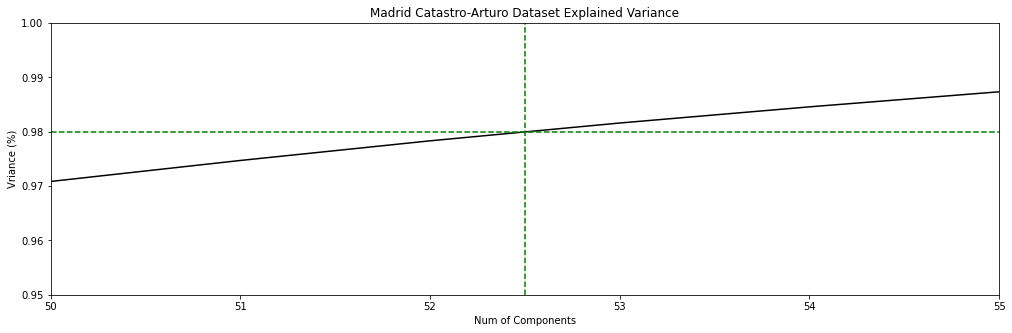

In [37]:
plt.figure(figsize=(17,5))
plt.plot(np.cumsum(geodata_pca.explained_variance_ratio_), c = 'k')
plt.axhline(0.98, ls = '--', c = 'g')
plt.axvline(52.5, ls = '--', c = 'g')

plt.xlabel('Num of Components')
plt.ylabel('Vriance (%)')
plt.title('Madrid Catastro-Arturo Dataset Explained Variance')

plt.ylim([0.95 ,1])
plt.xlim([50,55])
plt.show()

   The plot shows that selecting 9 components, I can preserve around 98-99% of the total variance of the data. It makes sence not to usse the 100% of our variance, because it denotes all components and we want only the principal ones.

In [38]:
# Optimum analysis
geodata_pca = PCA(n_components = 55)
madrid_pca_gdf = geodata_pca.fit_transform(madrid_scaled)

In [39]:
madrid_pca = pd.DataFrame(madrid_pca_gdf)

madrid_pca['ID'] = madrid_gdf.reset_index()['ID']
madrid_pca.set_index('ID', inplace = True)

madrid_pca

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
ID,,,,,,,,,,,,,,,,,,,,,
0002601VK4700A,-3.665107,1.737144,0.803050,4.481079,9.949202,4.158431,3.015547,-2.492177,0.323109,-2.699700,...,-0.291078,0.518982,-0.314562,0.264731,0.492785,-0.293469,-0.198265,0.498013,0.192846,0.307147
0002602VK4700A,-3.715196,1.747201,0.794427,4.483462,9.932711,4.148712,3.028330,-2.496642,0.309963,-2.705996,...,-0.329527,0.485008,-0.243554,0.297009,0.464225,-0.281558,-0.193279,0.487220,0.196620,0.295248
0002603VK4700A,-3.915814,1.937295,0.857189,4.539960,9.954614,4.506293,2.990254,-2.473210,0.213886,-2.647872,...,-0.388199,0.552529,-0.331447,0.193295,0.384692,-0.359957,-0.222694,0.518737,0.158607,0.310998
0002604VK4700A,-4.436636,2.423501,0.819652,4.868413,10.021563,4.865941,3.094401,-2.576247,0.085613,-2.283086,...,-0.555096,0.633108,-0.274808,0.156435,0.196541,-0.355946,-0.240451,0.494630,0.084271,0.265816
0002605VK4700A,-4.757889,2.788640,0.731574,5.230978,10.024195,5.340709,3.121880,-2.608764,-0.017604,-2.141441,...,-0.552780,0.654171,-0.252647,0.199898,0.023343,-0.439791,-0.285719,0.507842,0.039599,0.263212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999716VK4799H,-3.413367,-0.131136,0.092394,0.492746,-0.152367,-0.261036,-1.558766,-0.577414,-0.322685,-0.739308,...,-0.164192,0.100050,-0.230214,0.584874,-0.463908,-0.051661,0.158443,-0.446190,0.137598,-0.005394
9999717VK4799H,-3.430684,-0.112841,0.072186,0.469319,-0.168878,-0.264855,-1.511935,-0.530004,-0.363379,-0.718798,...,-0.099207,0.019874,-0.258659,0.554520,-0.522485,-0.073734,0.160640,-0.439655,0.116841,0.009898
9999718VK4799H,-3.430684,-0.112841,0.072186,0.469319,-0.168878,-0.264855,-1.511935,-0.530004,-0.363379,-0.718798,...,-0.099207,0.019874,-0.258659,0.554520,-0.522485,-0.073734,0.160640,-0.439655,0.116841,0.009898


#### 2.2 Lets use UMAP (Uniform Manifold Approximation and Projection)

Is a general-purpose manifold learning and dimension reduction algorithm created in 2018 by Leland McInnes, John Healy, James Melville. It is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.

It doesn't require PCA as a prior pre-processing step in the case of sparse matrices, like in the case of t-SNE, which is another -very similar- dim.red. method.

HYPERPARAMETERS that have an impact on the resulting embeddings:
>- **n_neighbors**: how balanced local vs. global structure in the data.
    * Low values: forces UMAP to focus on very local structures
    * High values: forces UMAP to focus on the larger neighbourhoods.

>- **min_dist**: controls how tightly UMAP is allowed to pack points together.
    * Low values: points will be clustered closely
    * High values: points will be clustered sparingly
    
>- **n_components**: determine the dimensionality of the reduced dimension space
>- **metric**: how distance is computed in the ambient space of the input data.

[link doc](https://umap-learn.readthedocs.io/en/latest/parameters.html?highlight=metric#metric)

In [40]:
import umap

reducer_geodata = umap.UMAP(random_state = STATE,
                            verbose = True,
                            learning_rate = 0.9, # tune
                            metric = 'correlation', # default euclidean
                            n_neighbors = 25,  # default 15
                            n_components = 10, # since from PCA 9 componentes losses around 0.01% of info and normal gdf w elbow is 24
                            repulsion_strength = 1.25,
                            local_connectivity = 1.25, #local connectivity constraint ensures that we focus on the difference in distances among nearest neighbors rather than the absolute distance
                            min_dist = 0.001 # default 0.1 lower val for clustering
                            )

reducer_geodata.fit(madrid_scaled)
geodata_embedding = reducer_geodata.transform(madrid_scaled)

# NOTES _________________
# Params with the most influence on this dataset:
# n_neighbors, n_components -> rely a lot on knowledge of the dataset
# min_dist -> makes the clustering 2D representation far more clearer
# metric -> cosine and euclidean give an error


UMAP(angular_rp_forest=True, learning_rate=0.9, local_connectivity=1.25,
     metric='correlation', min_dist=0.001, n_components=10, n_neighbors=25,
     random_state=42, repulsion_strength=1.25, verbose=True)
Construct fuzzy simplicial set
Mon Oct 19 10:43:30 2020 Finding Nearest Neighbors
Mon Oct 19 10:43:30 2020 Building RP forest with 20 trees
Mon Oct 19 10:43:32 2020 NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
Mon Oct 19 10:43:47 2020 Finished Nearest Neighbor Search
Mon Oct 19 10:43:50 2020 Construct embedding
	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Mon Oct 19 10:45:13 2020 Finished embedding


Text(0.5, 1.0, 'Geodata Embedding projection')

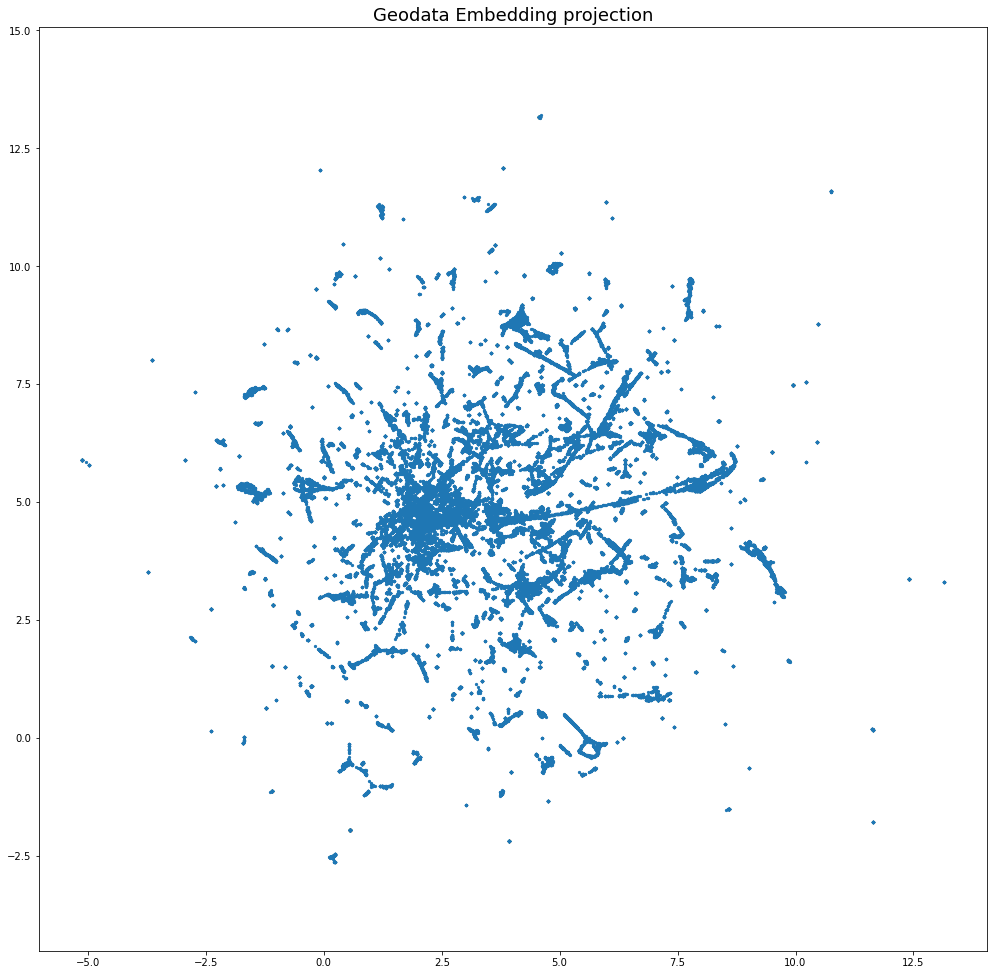

In [41]:
plt.figure(figsize = (17,17))
plt.scatter(x = geodata_embedding[:, 0], 
            y = geodata_embedding[:, 1], 
            s = 5)

plt.gca().set_aspect('equal', 'datalim')
plt.title('Geodata Embedding projection', fontsize=18)

## 3
### PARTITION CLUSTERING

Segreggat

### 3.1
#### KMEANS

Aims to partition the observations into a predifined number of clusters(k) in which each point belong to the cluster with the nearest mean. It starts by randomly selecting k centroinds ans assignin the points to the clustest cluster, then it updates each centroid with the mean of all points in the cluster.


**ELBOW METHOD**
In order to determine how many clusters are 

/home/lucia/miniconda3/envs/geoesp_env/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


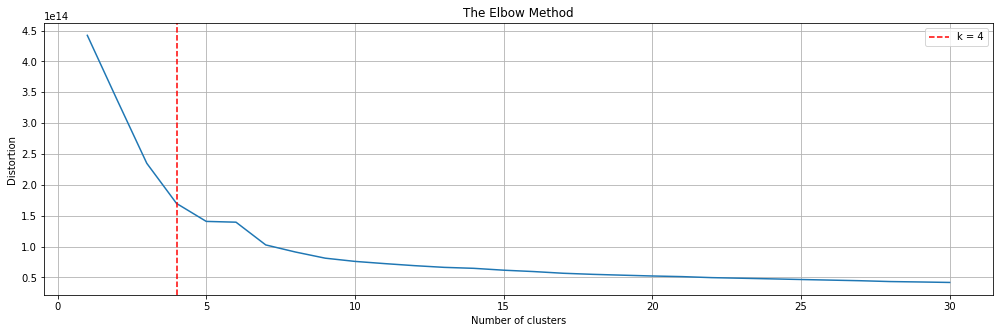

In [42]:
from sklearn.cluster import KMeans
max_k = 30

## make list with inertia
distortions = [] 
for i in range(1, max_k+1):
    model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = STATE)
    model.fit(madrid_gdf[mad_cols_df]) # it is needed to use the embedding for optimization
    distortions.append(model.inertia_)
        
        
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)]\
            .index(min([i*100 for i in np.diff(distortions, 2)]))
## plot
fig, ax = plt.subplots(figsize = (17,5))

ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', 
       xlabel='Number of clusters', 
       ylabel="Distortion")

ax.legend()
ax.grid(True)
plt.show()

**METRIC**

Since thruth labels are known, the evaluation of the clustering is rather subjective because the evaluation must be performed using the model itself.

The metrics provided by sklearn without the need of *thruth labels* are:
1. SILHOUETTE SCORE: *For a higher score, the silhouette metric relates to a model with better defined clusters*.
>- The score is bounded between -1..+1 for highly dense clustering.
>- Scores around zero (0) indicate overlapping clusters.
>- The score is higher when clusters are dense and well separated, which relates to the standard concept of a cluster.
>- The silhouette coef. is higher for convex clusters than other concepts of clusters, such as density based clusters like DBSCAN.

2. CALINSKI-HARABASZ INDEX (Variance Ratio Criterion); *A higher score relates to a model with better defined clusters*.
>- The score is higher when clusters are dense and well separated, which related to a standard concept of a cluster
>- The silhouette coef. is higher for convex clusters than other concepts of clusters, such as density based clusters like DBSCAN.

3. DAVIES-BOULDIN INDEX: *A lower index relates to a model with a better separation between clusters*.
>- It compares the distance between clusters with the size of the clusters themselves
>- Zero is the lowest possible score. **The closers to zero the better**.

In [76]:
from sklearn.cluster import KMeans
from sklearn import metrics

## 1
### Fit with geodata_embedding
km_model_emb = KMeans(n_clusters = 5, # k from the elbow method
                  random_state = STATE, 
                  max_iter = 750, 
                  init = 'k-means++', 
                  n_init = 15
                 ).fit(geodata_embedding) # here use of embedding

### Metrics
km_model_emb_var = metrics.calinski_harabasz_score(geodata_embedding, km_model_emb.labels_)
display(km_model_emb_var)

km_model_emb_db = metrics.davies_bouldin_score(geodata_embedding, km_model_emb.labels_)
display(km_model_emb_db)

7656.247151986835

2.2702245754947574

In [ ]:
## Silhouette Metric
km_model_emb_silh = metrics.silhouette_score(geodata_embedding, km_model_emb.labels_, metric = 'correlation')
display(km_model_emb_silh)

In [72]:
from sklearn.cluster import KMeans
from sklearn import metrics

### 2
### Fit with madrid_gdf
km_model = KMeans(n_clusters = 7, # k = 24 from the elbow method
                  random_state = STATE, 
                  verbose = False,
                  max_iter = 1200, 
                  init = 'k-means++', 
                  n_init = 25,
                  algorithm = 'auto'
                 ).fit(madrid_scaled)

### Metrics
#km_model_silh = metrics.silhouette_score(madrid_gdf[mad_cols_df], km_model.labels_, metric = 'correlation')
#display(km_model_silh)

km_model_var = metrics.calinski_harabasz_score(madrid_scaled, km_model.labels_)
display(km_model_var)

km_model_db = metrics.davies_bouldin_score(madrid_scaled, km_model.labels_)
display(km_model_db)

5232.208144867954

2.367522345106998

In [73]:
## Silhouette Metric
km_model_silh = metrics.silhouette_score(madrid_scaled, km_model.labels_, metric = 'correlation')
display(km_model_silh)

0.13299387002105925

**CONCLUSIONS**

Silhouette score is better for the embedding model but overall it seems that the hole gdf performs better for the hole dataset which is odd.

**VISUALIZATION**

After choosing model, lets see the final result within the 2D embedding representation and the the static map

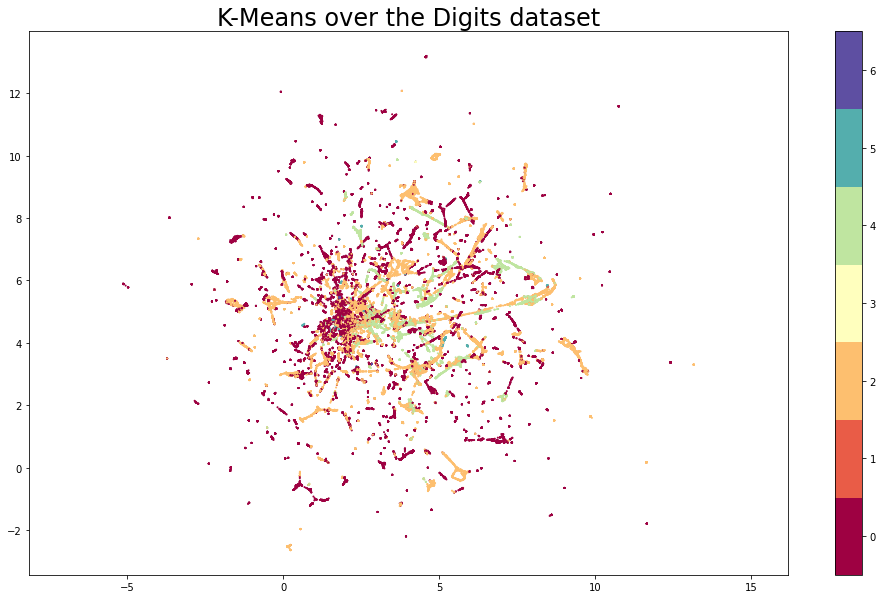

In [46]:
plt.figure(figsize = (17,10))

plt.scatter(geodata_embedding[:, 0], 
            geodata_embedding[:, 1], 
            c = km_model.labels_, 
            cmap = 'Spectral', 
            s = 1)

plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries = np.arange(km_model.n_clusters + 1) - 0.5)\
                            .set_ticks(np.arange(km_model.n_clusters))

plt.title('K-Means over the Digits dataset', fontsize=24);

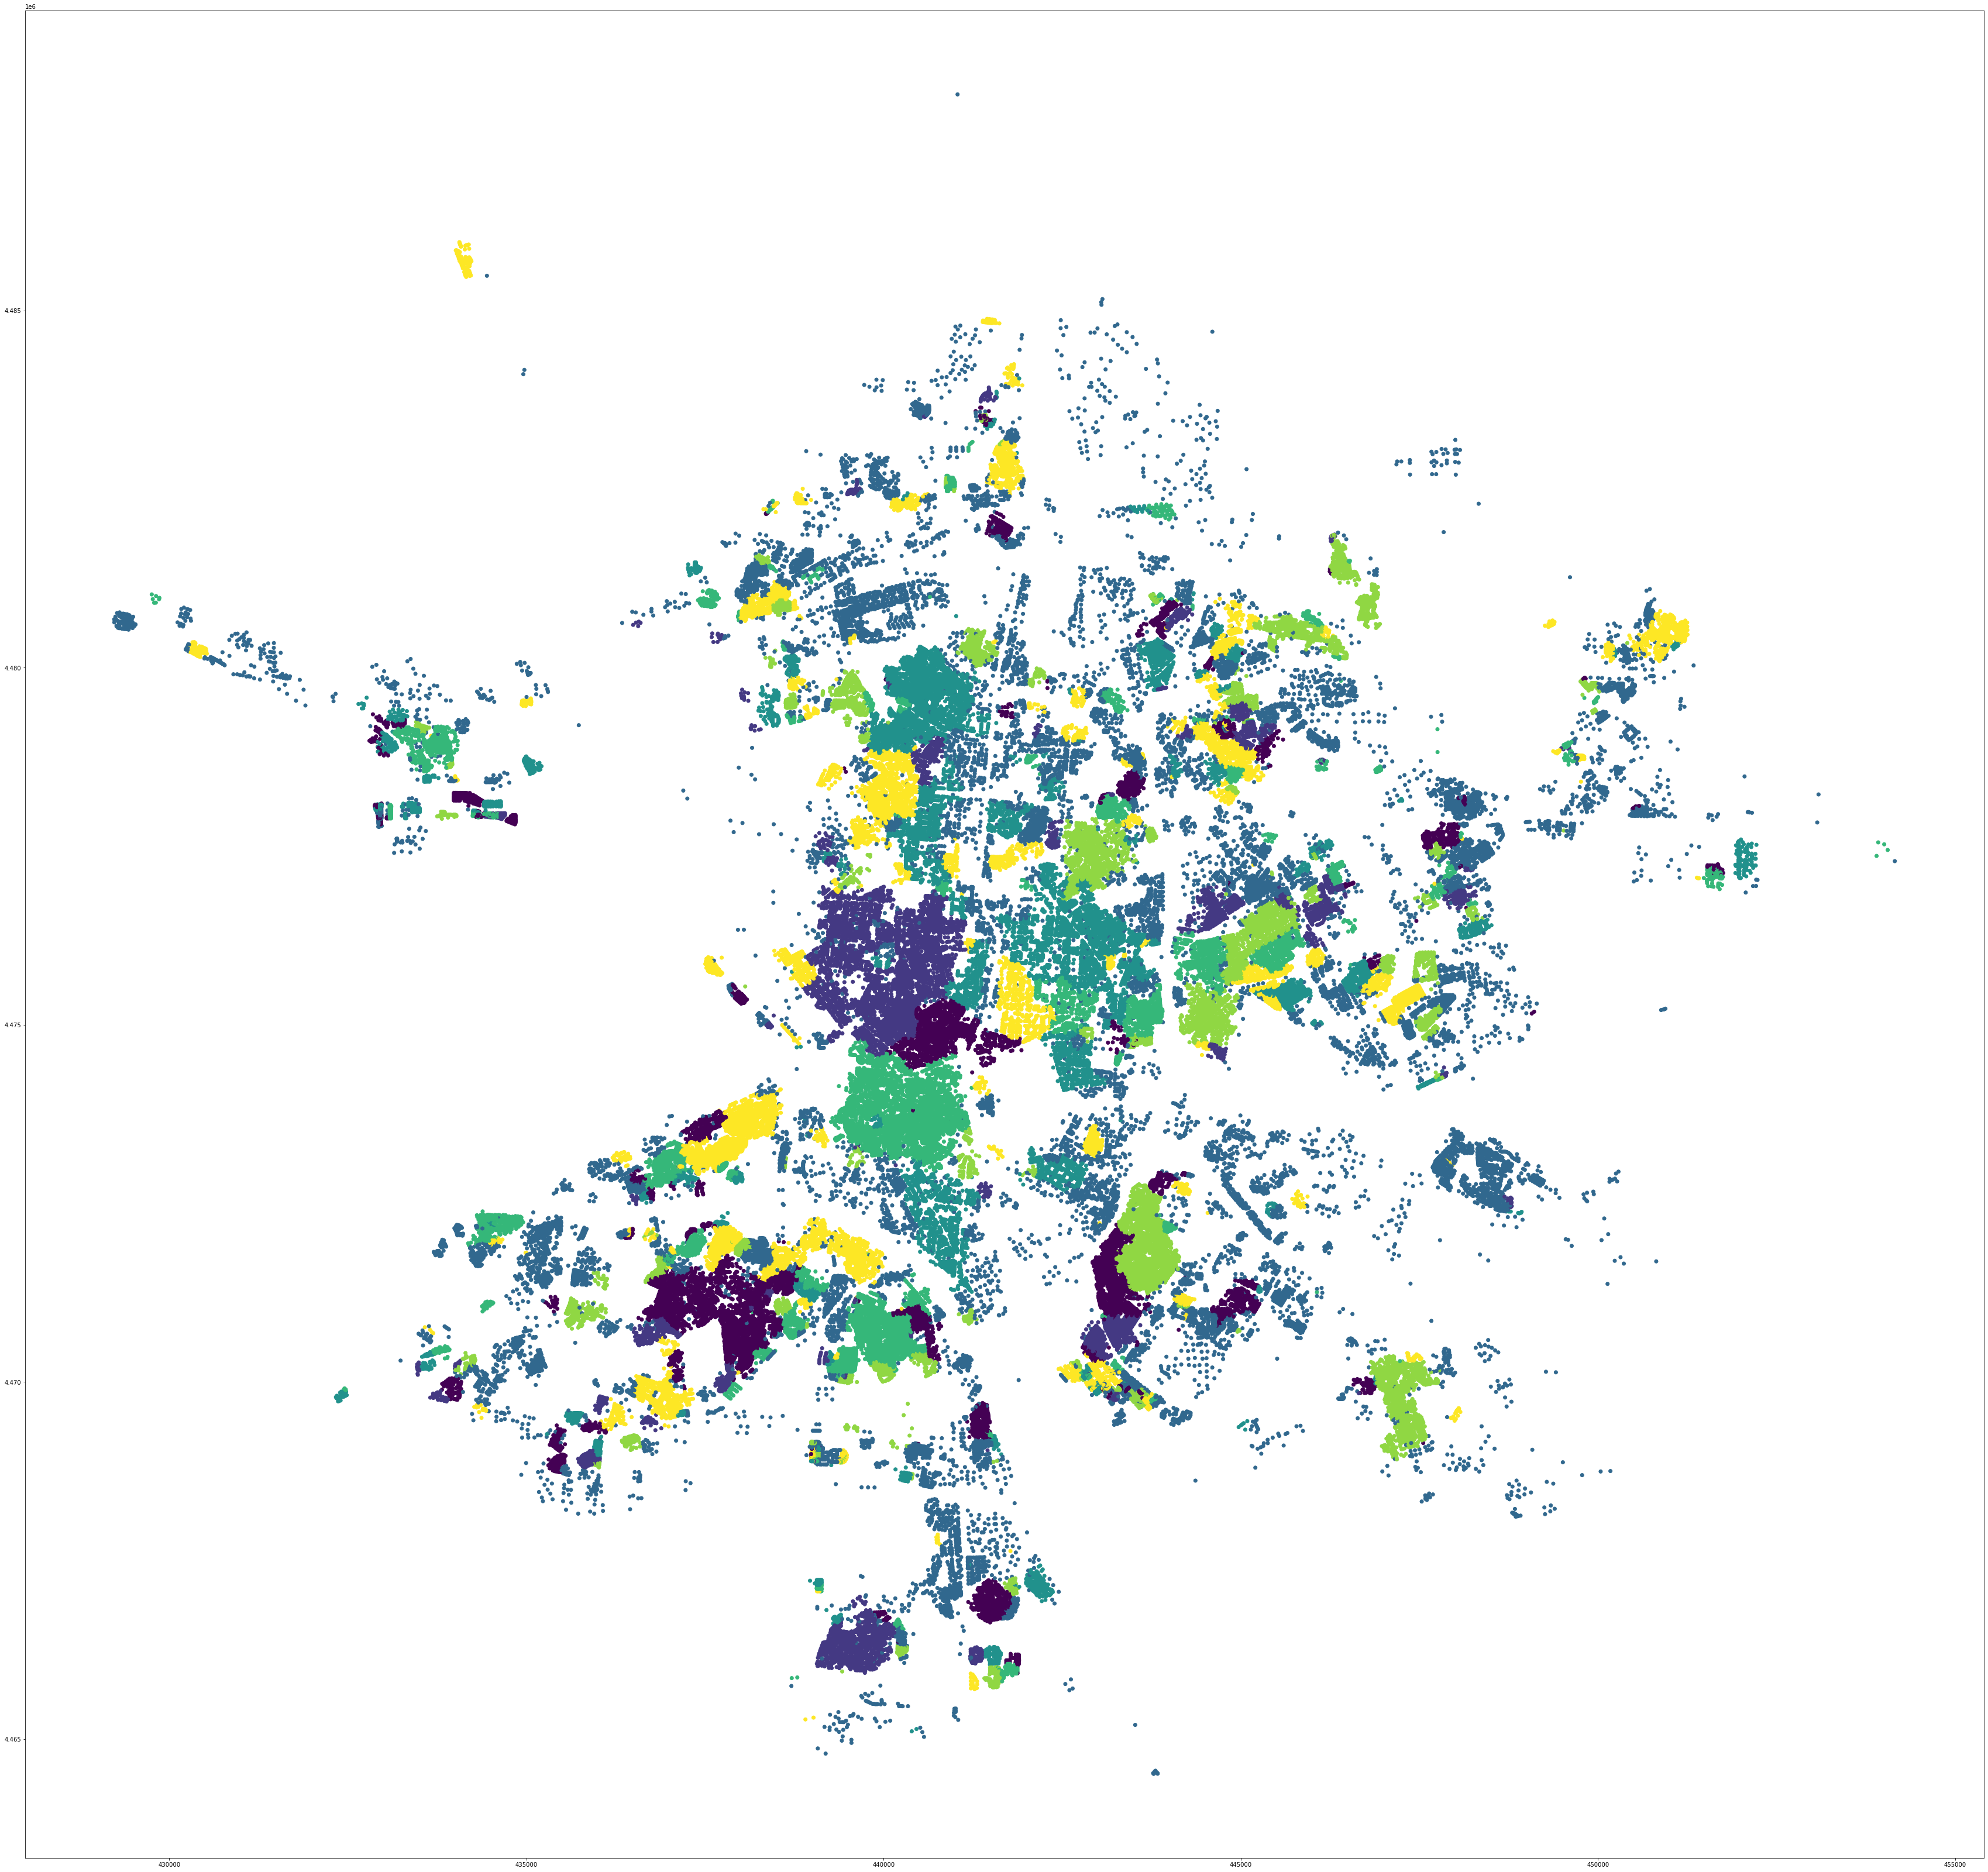

In [47]:
madrid_gdf['km_labels']= km_model_emb.labels_.tolist()

col_to_draw = 'km_labels' # col value corresponds grossfloorarea
madrid_gdf[['geometry', col_to_draw]].plot(figsize = (60,60), column = col_to_draw, legend = False)
plt.show()

### 3.2
#### KMENOIDS / CLARA

Its another partitioning method like KMeans. 
Medoid -> a point in the cluster that has minimum dissimilarities with all other points in the cluster.

Since KMenoids keeps failing lets pass to CLARA since its the version of KMenoids for large datasets
or CLARANS!

Big O O(k(n-k)^2) CLARA is more efficient that PAM

In [63]:
from pyclustering.cluster.clarans import clarans

# first lets implement the dataset as a list of lists
mad_lst = madrid_scaled.iloc[0:5000, :].values.tolist()

# clarans setup
clarans_instance = clarans(data = mad_lst, # list of tuples/lists representing objects
                           number_clusters = 7, # amount of clusters that should be allocated.
                           numlocal = 5, # amount of iterations for solving the problem
                           maxneighbor = 4) # neighbors examined

clarans_instance.process()

KeyboardInterrupt: 

In [136]:
clarans_clusters = clarans_instance.get_clusters() # Indexes of the points in each cluster
clarans_clusters

[]

### ANALYSIS OF RESULTS

Lets see how both algorithms have behaved

In [68]:
madrid_gdf['km_labels'].value_counts()

2    22033
3    13016
4    12969
6    12531
5    11499
0    10864
1     9610
Name: km_labels, dtype: int64

In [31]:
import shap

In [55]:
## directly from github!
explainer = shap.KernelExplainer(model = km_model.predict,
                                 data = madrid_gdf[mad_cols_df].iloc[:10, :],
                                 link = 'logit')

# use Kernel SHAP to explain labels
shap_values = explainer.shap_values(madrid_gdf[mad_cols_df], nsamples = 10)
# plot SHAP
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0,:],
                madrid_gdf[mad_cols_df].iloc[0,:],
                link = 'logit')

Using 92522 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SystemError: <built-in function isinstance> returned a result with an error set

In [ ]:
import sklearn, shap, matplotlib
blobs, labels = sklearn.datasets.make_blobs(n_samples=[100,100,100], n_features=2,random_state=49)
clusterer = sklearn.cluster.KMeans(n_clusters=3).fit(blobs)
matplotlib.pyplot.scatter(blobs[:,0],blobs[:,1],s=6,c=clusterer.labels_); plt.show()
explainer = shap.KernelExplainer(model=clusterer.predict,data=blobs)
shap_values = explainer.shap_values(blobs)
shap.initjs()
shap.summary_plot(shap_values, blobs)